<a href="https://colab.research.google.com/github/jamesmattluyon/CpE-AIML/blob/main/58034_LabNo_05_BrenanAndFriends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topic 05.1: Classification
$_{\text{©D.J. Lopez | 2021 | Fundamentals of Machine Learning}}$


## Laboratory Activity
1. For the laboratory activity, obtain a dataset of your liking from a data source. Explain the purpose of the dataset and mention any publication if it is obtained from the source. Provide a needs statement and significance for the dataset.

2. Identify an algorithm or method in performing a single variable classification using least squares or logistic regression. 

3. Present your solution implementing your algorithm of choice. You may use any library or package in this section. However, you are required to observe the following:

>* Enforce object-oriented programming by implementing at least two of the pillars of OOP in the entirety of the solution.
* Dedicated functions for training, predicting, and evaluating the solution.
* A DataFrame of the metrics of the solution
* A visualization of the solution’s results.


#Part 1

The chosen dataset provides information about the fraudalent credit card transactions (roughly 28,500 credit card transactions). Then, using Logistic Regression, we'll find transactions with a high likelihood of being fraudulent. As we all know, it's critical for credit card companies to spot fraudulent credit card transactions in order to prevent charging customers for products they didn't buy and to keep their money safe. This allows them to build trust with their clients. Machine learning algorithms are being developed and implemented across the financial sector to detect fraudulent transactions.



The dataset covers credit card transactions done by European cardholders in September 2013. In this dataset, 492 frauds out of 284,807 have found in transactions that occurred in the last two days. The dataset is heavily skewed, with the positive class (frauds) accounting for only 0.172 percent of all transactions.

 

Dataset Link – https://www.kaggle.com/mlg-ulb/creditcardfraud.




#Part 2


### Decision Tree Model 

The Decision Tree Model library in python is a free. For both classification and regression applications, decision trees are a non-parametric supervised learning approach. The goal of the approach is to create decision tree models that predict the target variable using a set of features/input variables.

#### *Algorithm*
*   To use Decision Tree Model to feed a dataset, containing a number of training instances, with a set of features and a target.
*   To develop the model, we started with a decision tree and utilized the 'DecisionTreeClassifier' technique. We set the'max depth' to '4' in the algorithm, which means we allow the tree to split four times, and the 'criterion' to 'entropy,' which is similar to'max depth' but determines when to stop splitting the tree. Finally, we've fitted the expected values into the 'tree yhat' variable and saved them.

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from termcolor import colored as cl # text customization
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.metrics import accuracy_score # evaluation metric
import itertools # advanced tools
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df.drop('Time', axis = 1, inplace = True)

print(df.head())

         V1        V2        V3        V4  ...       V27       V28  Amount  Class
0 -1.359807 -0.072781  2.536347  1.378155  ...  0.133558 -0.021053  149.62      0
1  1.191857  0.266151  0.166480  0.448154  ... -0.008983  0.014724    2.69      0
2 -1.358354 -1.340163  1.773209  0.379780  ... -0.055353 -0.059752  378.66      0
3 -0.966272 -0.185226  1.792993 -0.863291  ...  0.062723  0.061458  123.50      0
4 -1.158233  0.877737  1.548718  0.403034  ...  0.219422  0.215153   69.99      0

[5 rows x 30 columns]


In [ ]:
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of Non-fraud cases are 492
Percentage of fraud cases is 0.17
--------------------------------------------


In [ ]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))

CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------


In [ ]:
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(df['Amount'].head(10), attrs = ['bold']))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


In [ ]:
X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:20])

X_train samples :  [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489556  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]
X_test samples :  [[-0.32333357  1.05745525 -0.04834115 -0.60720431  1.25982115 -0.09176072
   1.1591015  -0.12433461 -0.17463954 -1.64440065 -1.11886302  0.20264731
   1.14596495 -1.80235956 -0.24717793 -0.06094535  0.84660574  0.37945439
   0.84726224  0.18640942 -0.20709827 -0.43389027 -0.26161328 -0.04665061
   0.2115123   0.00829721  0.10849443  0.16113917 -0.19330595]]
y_train samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_test samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
#Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))

Accuracy score of the Decision Tree model is 0.9993679997191109


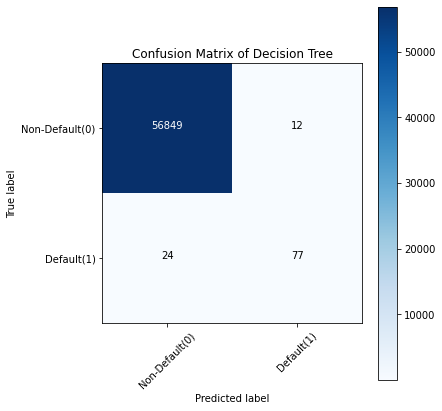

In [ ]:
# Confusion Matrix
def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

#Part 3

### *Solution*

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

In [ ]:
class LogistRegression():

  def train(self, X, y): 
    self.model_ = LogisticRegression(random_state=0).fit(X, y)
    return self.model_
  
  def predict(self, x):
    self.predictions = self.model_.predict(x)
    df = pd.DataFrame(self.predictions, columns = ['ouput'])
    return df.value_counts(), df

  def intercepts(self, X):
    return self.model_.intercept_

  def coefficients(self, x):
    return self.model_.coef_

  def evaluate(self, X, y):
    preds = self.predictions
    dataframe = {'Metrics Value': {
          'Accuracy': metrics.accuracy_score(y, preds),
          'Precision': metrics.precision_score(y, preds),
          'Recall': metrics.recall_score(y,preds),
          'F1-Score': metrics.f1_score(y, preds),
          'L2 Error': np.sqrt(np.sum(np.square(y - preds)))
      }  
    }
    df = pd.DataFrame(dataframe)
    return df

  def visualize(self, X, y):
    plt.figure(figsize=(5.43,5))
    plt.scatter(X, y, color='red')
    plt.scatter(X, self.predictions, color='green')
    plt.grid()
    plt.figure(figsize=(5,5))
    conf_mat = confusion_matrix(y, self.predictions)
    sns.heatmap(conf_mat, annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Ground Truth")
    return plt.show()

In [ ]:
df = pd.read_csv('/content/creditcard.csv')
df.fillna(0)
np.any(np.isnan(df))
df = df.reset_index()

In [ ]:
X = df['V1'].to_numpy().reshape((-1,1))
y = df['Class'].to_numpy()

In [ ]:
logit = LogistRegression()

In [ ]:
logit.train(X,y)

LogisticRegression(random_state=0)

In [ ]:
logit.predict(X)

(ouput
 0        284770
 1            37
 dtype: int64,         ouput
 0           0
 1           0
 2           0
 3           0
 4           0
 ...       ...
 284802      0
 284803      0
 284804      0
 284805      0
 284806      0
 
 [284807 rows x 1 columns])

In [ ]:
logit.intercepts(X)

array([-6.60760808])

In [ ]:
logit.coefficients(X)

array([[-0.22460045]])

In [ ]:
logit.evaluate(X,y)

,Metrics Value
Accuracy,0.998157
F1-Score,0.007561
L2 Error,22.912878
Precision,0.054054
Recall,0.004065


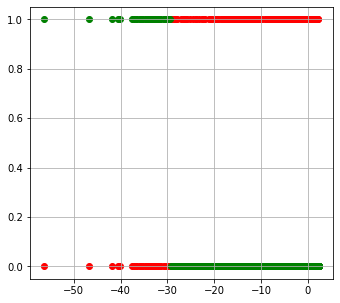

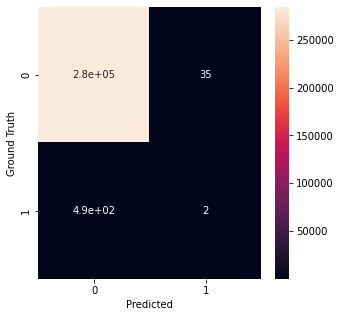

In [ ]:
logit.visualize(X,y)

The plot above shows the relationship between the ground truth and predicted values. The vertical heat scale is the basis of the corresponding correlation for each variable. The 0 and 1 values corresponds to the possibility of fraudelent activity of credit card transactions where 0 has no fraudelent possibility while 1 has the possibility of fraudelent activity. According to the concluded truth from the dataset, there has been little to no detected fraudelent activity. This resulted to no fraudelent predictions in the future detected by the algorithm.